### Sample Analysis of the Stroop Effect

#### (1) What is the independent variable? What is the dependent variable?

Indepented variable: Condition (Congruent words / Incongruent words)

Dependent variable: Time it takes to name the ink colors in each condition.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

First, I would be interested in comparing if there is a significant difference to complete the task under each condition. Moreover, my intuition is that the task under the second condition (Incongruent words) could be confusing, and therefore longer to complete. 

Let $\mu_d$ be the mean difference between the average time it takes a member of the population to perform the task under each condition $(\mu_d = \mu Congruent - \mu Incongruent)$, then the set of hypotheses would be:

$H_0: \mu_d \geq 0$ (The task with congruent words takes more or at the least same time to complete as the task with incongruent words regarding the population)

$H_a: \mu_d < 0$ (Task with incongruent words takes more time to complete regarding the population)

##### Testing hypotheses

It is important to note:
Given that measurements for each condition correspond to times for the same participant we can say this ara paired samples.
We have two samples of $n=24$ (42 entries in total).
We don't know the population standard deviation but the differences in the samples distribution are approximately normal.

With this information, the statistical method proposed to test these hypotheses would be a right-tailed t-test.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd

df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


As we can see in above table, the standard deviation is 3.56 for the Congruent condition and 4.8 for the Incongruen condition. This make sense if we have a look at the minimum and maximum values of the Congruent (8.6 - 22.33) and Incongruent conditions (15.69 - 35.23).

In the case of the Congruent condition we observe a mean of 14.05 while for the Incongruent condition, there is a higher value: 22.02. This is consistent with the intuition presented before, but we can not state yet that this is not due to pure chance.

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

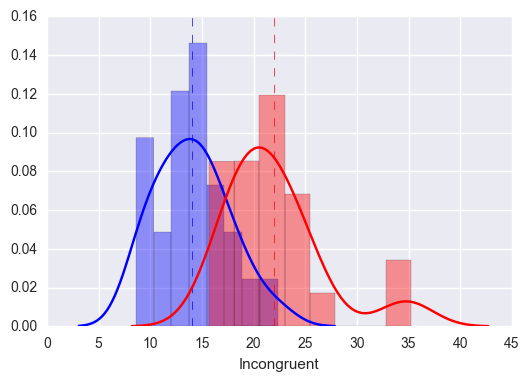

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.distplot(df['Congruent'],bins=8, color='blue')
plt.axvline(x=df['Congruent'].mean(), linewidth=.5, linestyle='dashed', color='blue')
sns.distplot(df['Incongruent'],bins=8, color='red')
plt.axvline(x=df['Incongruent'].mean(), linewidth=.5, linestyle='dashed', color='red')

We can see that the distributions are not very different in terms of shape (deviation). Although, the mean for the Incongruent sample is clearly moved to right of the Congruent sample (higher), which again is consistent with the previous tendency description.

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [14]:
import scipy.stats as st

st.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

Before starting the analysis, there are a few things we need to find and define. First is the level of confidence, which we are going to keep as the standard in science, which is a level of 95% of confidence. If we also consider that this is a right-taill test, the rejection area would be $\alpha = 0.05$.

Then we need to find the degrees of freedom. Because this samples are dependent, we simply calculate the degrees of freedom like this: $df = n - 1 = 23$

Now with these two values we can go to the t-tables and lookup for the critical t-value, which is $T = 1.714$ for the right tail.

---

If we look at the result of the p-value for a two-tail test of $p = 4.1030005857111781e-08$, we can inmidiately tell that $p/2$ is much lower than the value of $\alpha = 0.05$.

So with $(p < \alpha$ and $|t| > T)$, we have found enough evidence to reject the null hypotheses $H_0$ and accept $H_a$. In other words, we can say with 95% of confidence that, the task with incongruent words takes statistically more time to complete than the task with congruents words regarding the population.


#### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

As stated at the begining, this observed efffect could be a result of a more complex task to perform. Perhaps due to the noise that creates the actual name of a color different to it's ink color. It would seem like the mind, when presented a word, can't help but read it even if the desired task is different (decribe its' ink color).

Maybe some similiar effects would occur by elaborating experiments involving the psychological phenomena: [Semantic satiation](https://en.wikipedia.org/wiki/Semantic_satiation) and [Gestaltzerfall](https://en.wikipedia.org/wiki/Gestaltzerfall).

### Sources

##### Websites:
- https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
- http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
- http://www.statisticshowto.com/one-tailed-test-or-two/
- http://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest
- https://www.danielsoper.com/statcalc/calculator.aspx?id=10
- https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy/15984310


##### Videos:

- https://www.youtube.com/watch?v=vB1OmEY5Rcw
- https://www.youtube.com/watch?v=siFNMaXobBE
- https://www.youtube.com/watch?v=pTmLQvMM-1M

#### Documentation

- https://matplotlib.org/users/mathtext.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
- https://docs.scipy.org/doc/